<h1>Robust methods</h1>

In [1]:
import math
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Hampel's theorem</h2>

In [8]:
# x values N(0,1)
data = np.random.normal(0,1,10000)
# estimate parameters
t = data.mean()
s = data.std()

AttributeError: module 'matplotlib.pyplot' has no attribute 'cdf'

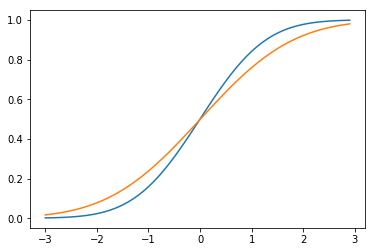

In [28]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
plt.plot(x,Phi)
Phi1 = scipy.stats.norm.cdf(x,t,s)
plt.plot(x,Phi1)
#plt.cdf(abs(x))

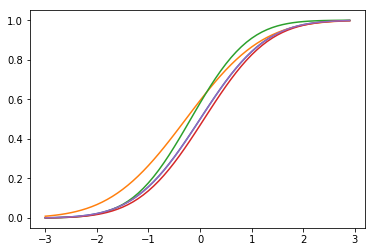

In [11]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
plt.plot(x,Phi)
for i in range(1,5):
    ndata = 10**i
    data = np.random.normal(0,1,ndata)
    t = data.mean()
    s = data.std()
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi1)
    

0.183866508237 0.921720241273
0.000729814677763 0.93438327934
0.0759646109996 0.988438070446
0.0135332214362 0.992005924166
0.00350251548723 1.00074347178
-0.000248263906889 1.00021946834


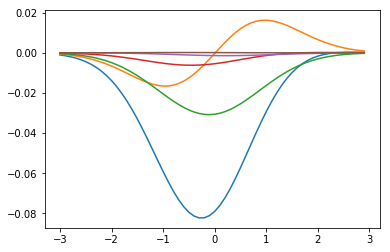

In [16]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
for i in range(1,7):
    ndata = 10**i
    data = np.random.normal(0,1,ndata)
    t = data.mean()
    s = data.std()
    print(t,s)
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi1-Phi)

<h2>Contamination</h2>

In [17]:
data = np.random.normal(0,1,1000)
data[990:] = np.random.normal(1,10,10)
np.random.shuffle(data)

In [18]:
data.mean(), data.std()

(-0.033698233521666503, 1.6698224251988594)

0.782519156542 0.963518945797
0.230908096895 3.19352069863
0.0621410518877 3.53865828453
0.151650973935 3.296881673
0.104026205715 3.34665828879
0.100199804519 3.32055860399


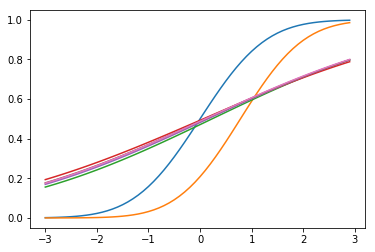

In [23]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
plt.plot(x,Phi)
for i in range(1,7):
    ndata = 10**i
    data = np.random.normal(0,1,ndata)
    m = int(0.1*ndata)
    data[0:m] = np.random.normal(1,10,m)
    np.random.shuffle(data)
    t = data.mean()
    s = data.std()
    print(t,s)
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi1)

In [24]:
def Tstat(data):
    return data.mean(),data.std()

-0.0453073502611 0.957435317021
0.0340754436077 1.47387180455
-0.0530665332315 1.40093436163
-0.00987582869931 1.42322262206
0.0195842341708 1.41898638768
0.00740359606065 1.41146783134


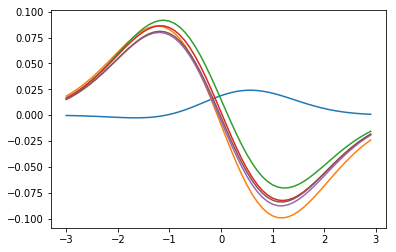

In [25]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
for i in range(1,7):
    ndata = 10**i
    data = np.random.normal(0,1,ndata)
    m = int(0.01*ndata)
    data[0:m] = np.random.normal(1,10,m)
    np.random.shuffle(data)
    t,s = Tstat(data)
    print(t,s)
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi1-Phi)

<h2>Median</h2>

In [31]:
def Tmedian(data):
    t = np.median(data)
    # s = MAD()
    s = np.median(abs(data - t)) / 0.6745
    return t,s

0.724596693687 0.582073115994
-0.260405245397 0.9210824468
0.000697404062628 1.16190917881
0.00393159586723 1.10690476523
0.0101374982866 1.11996286008
0.0113613288852 1.11707348077


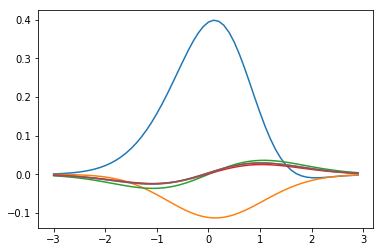

In [33]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
for i in range(1,7):
    ndata = 10**i
    data = np.random.normal(0,1,ndata)
    m = int(0.1*ndata)
    data[0:m] = np.random.normal(1,10,m)
    np.random.shuffle(data)
    t,s = Tmedian(data)
    print(t,s)
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi-Phi1)

<h2>Winsorisation</h2>
$$
x \to \left\{ \begin{array}{l} a, x > a, \\ x, \\ -a, x < -a \end{array} \right.
$$

In [34]:
def Twinsor(x):
    a = 1.345
    for i in range(0,x.size):
        if( x[i] > a ):
            x[i] = a
        elif( x[i] < -a ):
            x[i] = -a                 
    #x = np.piecewise(x,[abs(x)<=a, x < -a, x > a], [lambda x: x, lambda x: -a, lambda x: a])
    #x = np.max(-a,np.min(x,a))
    t = data.mean()
    s = data.std()
    return t, s/0.87   # by N(0,1)
# Assumption: scale == 1 !

0.0418277072584 0.861823927341
-0.033152313385 1.04828822671
0.0695988269636 1.05070781516
0.022311866169 1.03586144821
0.013859494494 1.03342673061
0.0105299724548 1.03270365011


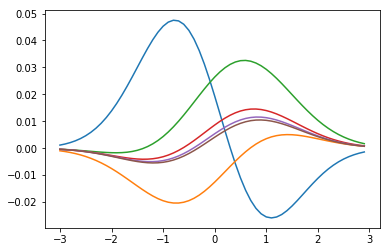

In [36]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
for i in range(1,7):
    ndata = 10**i
    data = np.random.normal(0,1,ndata)
    m = int(0.1*ndata)
    data[0:m] = np.random.normal(1,10,m)
    np.random.shuffle(data)
    t,s = Twinsor(data)
    print(t,s)
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi-Phi1)

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

<h2>Robust functions</h2>

Huber (minimax):
$$
\psi(x) = \mathrm{max}(-a,\mathrm{min}(x,a))
$$

Tukey:
$$
\psi(x) = \left\{ \begin{array} x [1- (x/6)^2]^2, |x| \le 6,\\ 0, |x| > 6 \end{array} \right.
$$

In [37]:
def RobTukey(x):
    psi = np.zeros(x.size)
    for i in range(0,x.size):        
        if( abs(x[i]) <= 6 ):
            psi[i] = x[i]*(1-(x[i]/6)**2)**2
        else:
            psi[i] = 0
    #psi = np.piecewise(x,[abs(x) <= 6, abs(x) > 6], [lambda x: x*(1-(x/6)**2)**2, lambda x: 0])
    return psi        

def dRobTukey(x):
    dpsi = np.zeros(x.size)
    for i in range(0,x.size):        
        if( abs(x[i]) <= 6 ):
            u = (x[i] / 6)**2
            dpsi[i] = 1 + u*(5*u - 6)
        else:
            dpsi[i] = 0
    return dpsi   


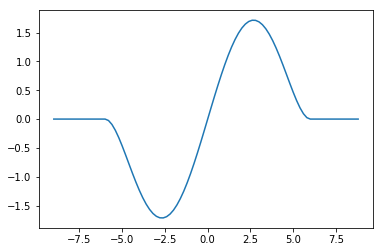

In [38]:
u = np.arange(-9,9,0.2)
plt.plot(u,RobTukey(u))

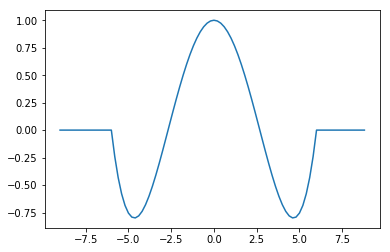

In [39]:
u = np.arange(-9,9,0.2)
plt.plot(u,dRobTukey(u))

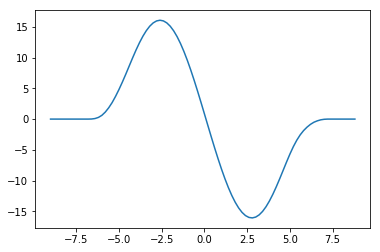

In [43]:
u = np.arange(-9,9,0.2)
ndata = 10
data = np.random.normal(0,1,ndata)
m = int(0.01*ndata)
data[0:m] = np.random.normal(1,10,m)
psi = np.zeros(u.size)
for i in range(0,u.size):
    psi[i] = np.sum(RobTukey(data-u[i]))
plt.plot(u,psi)

In [44]:
def Trob(data):
    
    # init by median() -- robust method, important
    t = np.median(data)
    scale = np.median(abs(data - t)) / 0.6745 # MAD
    print("initial estimation: t= {0:.5f}    scale= {1:0.3f} ".format(t,scale))
    
    # f(t) = 0 by Newton method
    for iter in range(0,666):
        f = sum(RobTukey((data-t)/scale)) 
        df = sum(dRobTukey((data-t)/scale))        
        d = scale * (f / df)
        t = t + d
        print("iter={0:2d}   t={1:8.5f}   d={2:10.7f} ".format(iter,t,d))
        if abs(d) < 1e-5:
            break
    
    psi2 = sum(RobTukey((data-t)/scale)**2)
    dpsi = sum(dRobTukey(data-t)/scale)
    n = data.size
    sig2 = scale**2*n**2/(n-1)*psi2 / dpsi**2
    sig = math.sqrt(sig2)
    
    print("final estimate: t= {0:.5f}   sig= {1:.3f}   stderr= {2:.1e}".format(t,sig,sig/math.sqrt(data.size)))
    return t,sig


In [45]:
ndata = 10000
data = np.random.normal(0,1,ndata)
m = int(0.1*ndata)
data[0:m] = np.random.normal(1,10,m)
Trob(data)
t,s = Tstat(data)
print("Just for a comparison: t={0:.3f}  sig={1:.3f}".format(t,s))

initial estimation: t= 0.01805    scale= 1.134 
iter= 0   t= 0.01484   d=-0.0032107 
iter= 1   t= 0.01484   d= 0.0000000 
final estimate: t= 0.01484   sig= 1.341   stderr= 1.3e-02
Just for a comparison: t=0.114  sig=3.336


N =  10
initial estimation: t= 0.10518    scale= 0.572 
iter= 0   t= 0.05344   d=-0.0517354 
iter= 1   t= 0.05349   d= 0.0000460 
iter= 2   t= 0.05349   d=-0.0000000 
final estimate: t= 0.05349   sig= 0.290   stderr= 9.2e-02
Tukey: 0.0534883310397 0.28984162605270714
N =  100
initial estimation: t= 0.01179    scale= 1.034 
iter= 0   t=-0.05852   d=-0.0703049 
iter= 1   t=-0.05848   d= 0.0000369 
iter= 2   t=-0.05848   d= 0.0000000 
final estimate: t= -0.05848   sig= 1.061   stderr= 1.1e-01
Tukey: -0.0584817841542 1.0605902081157719
N =  1000
initial estimation: t= -0.03220    scale= 0.952 
iter= 0   t=-0.01838   d= 0.0138221 
iter= 1   t=-0.01838   d=-0.0000002 
final estimate: t= -0.01838   sig= 0.935   stderr= 3.0e-02
Tukey: -0.0183769924951 0.9354830545255373
N =  10000
initial estimation: t= 0.01305    scale= 0.980 
iter= 0   t= 0.00888   d=-0.0041686 
iter= 1   t= 0.00888   d= 0.0000000 
final estimate: t= 0.00888   sig= 0.984   stderr= 9.8e-03
Tukey: 0.00888028103579 0.9840837575

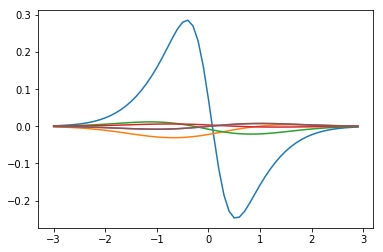

In [46]:
x = np.arange(-3,3,0.1)
Phi = scipy.stats.norm.cdf(x,0,1)
for i in range(1,7):
    ndata = 10**i
    print("N = ",ndata)
    data = np.random.normal(0,1,ndata)
    m = int(0.01*ndata)
    data[0:m] = np.random.normal(1,10,m)
    np.random.shuffle(data)
    t,s = Trob(data)
    print("Tukey:",t,s)
    Phi1 = scipy.stats.norm.cdf(x,t,s)
    plt.plot(x,Phi-Phi1)